<a href="https://colab.research.google.com/github/csmithLibrary/OpenAlex/blob/main/ExploreOpenAlex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Retrieved 200 publications
Retrieved 400 publications
Retrieved 600 publications
Retrieved 800 publications
Retrieved 1000 publications


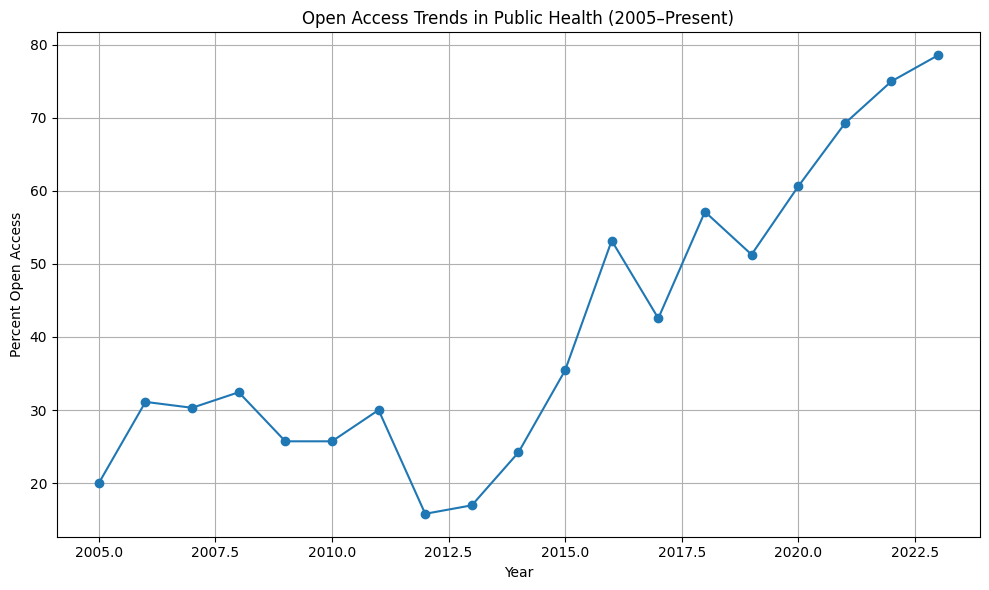

In [22]:
#lets you import data through https
import requests
#uses dataframes for data manipulation
import pandas as pd # Alias pandas as pd for conventional usage
#make graphs and charts
import matplotlib.pyplot as plt

#public health concept ID
concept_id = "C142362112"

#Base API URL
url = "https://api.openalex.org/works"

# parameters: limit to recent works from 2005 onward
params = {
    "filter": f"concepts.id:{concept_id},from_publication_date:2005-01-01,to_publication_date:2023-12-31", # Corrected filter syntax with colon
    "per-page": 200,
    "mailto": "cecilia1183@gmail.com"

}
#pulls the results
results = []
#the cursor is like a bookmark, where to start
cursor = "*"

#pull up to 1000 results from the webpage, in a python format, show n results
while cursor and len(results) < 1000:
    response = requests.get(url, params={**params, "cursor": cursor})

    # Add this error handling here
    if response.status_code != 200:
        print(f"Error: Status code {response.status_code}")
        try:
            error_info = response.json()
            print("Message:", error_info.get("error", error_info))
        except Exception: # Added the colon here
            print("No JSON error message available")
        break  # stop the loop because of error - Corrected indentation

    data = response.json()
    results.extend(data["results"])
    cursor = data.get("meta", {}).get("next_cursor")

    print(f"Retrieved {len(results)} publications")

# After the loop, process the data outside the loop
#flatten to data frame
# Use pd.DataFrame since we imported pandas as pd
df = pd.DataFrame([
    { "year": w["publication_year"],
      "is_oa": w["open_access"]["is_oa"]
    }
    for w in results if w.get("publication_year") is not None # Use .get() for safe access
])

if not df.empty: # Check if the dataframe is not empty before proceeding
    df.head()

    #calculates proportion of open access articles each year
    oa_summary = df.groupby("year")["is_oa"].agg(["mean","count"]).reset_index()
    oa_summary.rename(columns={"mean": "oa_percent", "count": "total_articles"}, inplace=True)
    oa_summary["oa_percent"] *= 100 #convert to percent
    oa_summary.head()

    #plot results
    plt.figure(figsize=(10, 6))
    plt.plot(oa_summary["year"], oa_summary["oa_percent"], marker='o', linestyle='-')
    plt.title("Open Access Trends in Public Health (2005–Present)")
    plt.xlabel("Year")
    plt.ylabel("Percent Open Access")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No data retrieved to process.")